In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [2]:
# generating the sample data from make_blobs
# this particular setting has one distinct cluster and 3 cluster placed close to each other
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(10.0,10.0),
                  shuffle=True,
                  random_state=1)   #for reproducibility

range_n_clusters = [2,3,4,5,6]

In [3]:
X

array([[10.14164054,  7.48369614],
       [ 8.43426185, 11.01382247],
       [10.36723181, 11.23289919],
       [ 9.35308331, 10.90148689],
       [ 8.70474211, 10.07432055],
       [10.6590498 ,  8.37256166],
       [11.45652739, 10.31663724],
       [10.93514778, 11.81252782],
       [12.0546241 , 10.05340954],
       [10.72555052,  9.67579578],
       [11.91979229,  8.60830612],
       [ 9.96818283, 10.11248774],
       [10.44838065, 11.1253235 ],
       [ 9.82757179,  9.12214158],
       [ 8.93212342,  9.92332064],
       [ 9.72415394, 11.22895559],
       [12.05117344, 10.585662  ],
       [ 8.81889683,  9.5400699 ],
       [ 9.6775828 ,  9.61594565],
       [11.92381543,  9.39401868],
       [ 9.5208429 , 10.35016716],
       [ 8.97811406, 10.79452824],
       [11.10223673,  8.77042575],
       [ 9.25284171, 11.6924546 ],
       [ 9.5533008 , 10.20437739],
       [ 9.68543614,  8.65498998],
       [10.19829972, 10.11900865],
       [10.74055645,  9.0462994 ],
       [ 9.58836084,

In [4]:
y

array([2, 2, 1, 0, 3, 0, 3, 3, 1, 3, 2, 2, 3, 0, 3, 2, 1, 2, 0, 3, 1, 1,
       3, 0, 3, 3, 0, 0, 1, 3, 2, 0, 3, 2, 3, 2, 1, 1, 2, 1, 3, 1, 0, 3,
       3, 2, 1, 3, 0, 0, 0, 1, 1, 3, 2, 1, 1, 1, 1, 3, 0, 0, 1, 3, 0, 3,
       2, 3, 1, 1, 2, 1, 3, 2, 3, 3, 2, 3, 3, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 2, 1, 3, 0, 2, 2, 3, 2, 0, 0, 2, 0, 1, 0, 3, 3, 0, 0, 1,
       3, 2, 0, 1, 0, 1, 0, 3, 0, 3, 1, 2, 2, 1, 3, 1, 0, 2, 2, 3, 0, 1,
       1, 1, 1, 2, 0, 3, 0, 0, 3, 2, 3, 0, 0, 0, 3, 3, 2, 2, 1, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 3, 0, 2, 1, 3, 2, 0, 1,
       1, 1, 1, 2, 3, 1, 0, 2, 2, 1, 3, 2, 2, 3, 0, 0, 2, 2, 3, 0, 3, 2,
       2, 0, 2, 1, 0, 3, 3, 2, 3, 1, 2, 3, 1, 3, 1, 2, 3, 3, 3, 0, 1, 0,
       3, 2, 1, 3, 1, 1, 1, 0, 3, 0, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 3, 1,
       2, 2, 2, 2, 3, 1, 2, 1, 3, 0, 0, 3, 3, 0, 1, 3, 1, 0, 3, 0, 1, 1,
       0, 3, 2, 2, 1, 1, 1, 3, 0, 0, 3, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 3, 1, 1, 1, 3, 3, 3, 2, 0, 2, 1, 2, 3, 2,

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

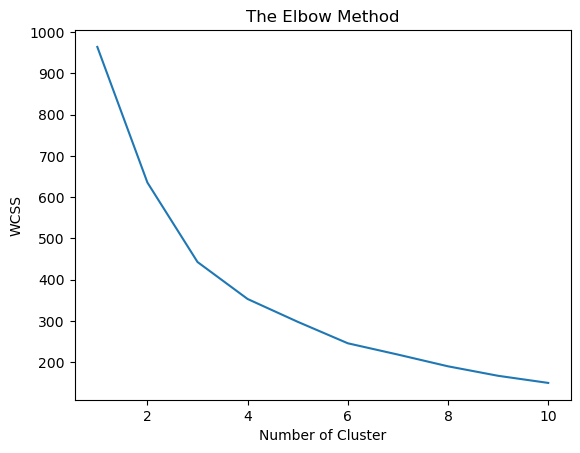

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [7]:
# as we can see that there is fracture in curve we can see that fracture are on few points such as 3,4 and 6. So, we will check all those points
# using silhoutte score

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.32048158610509786


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.3364067951599466


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.32630211807230397


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.3180999049735845


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.31831107884449195


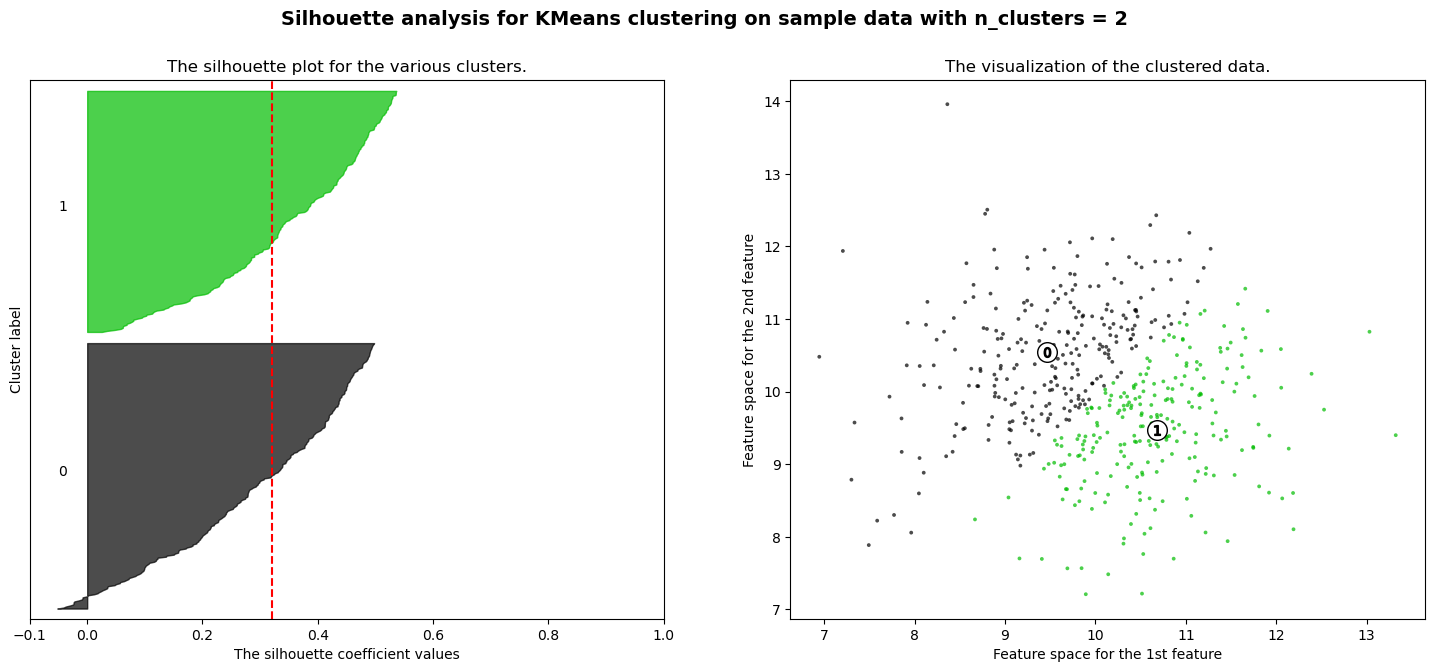

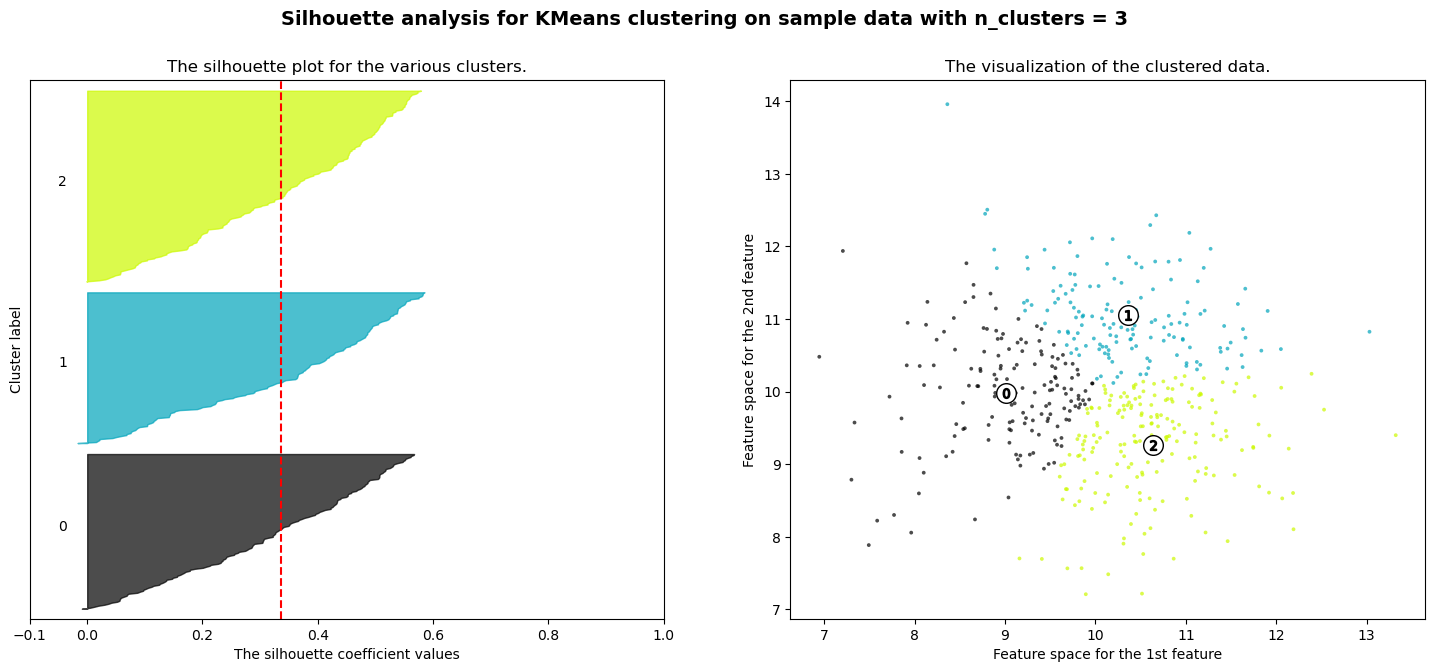

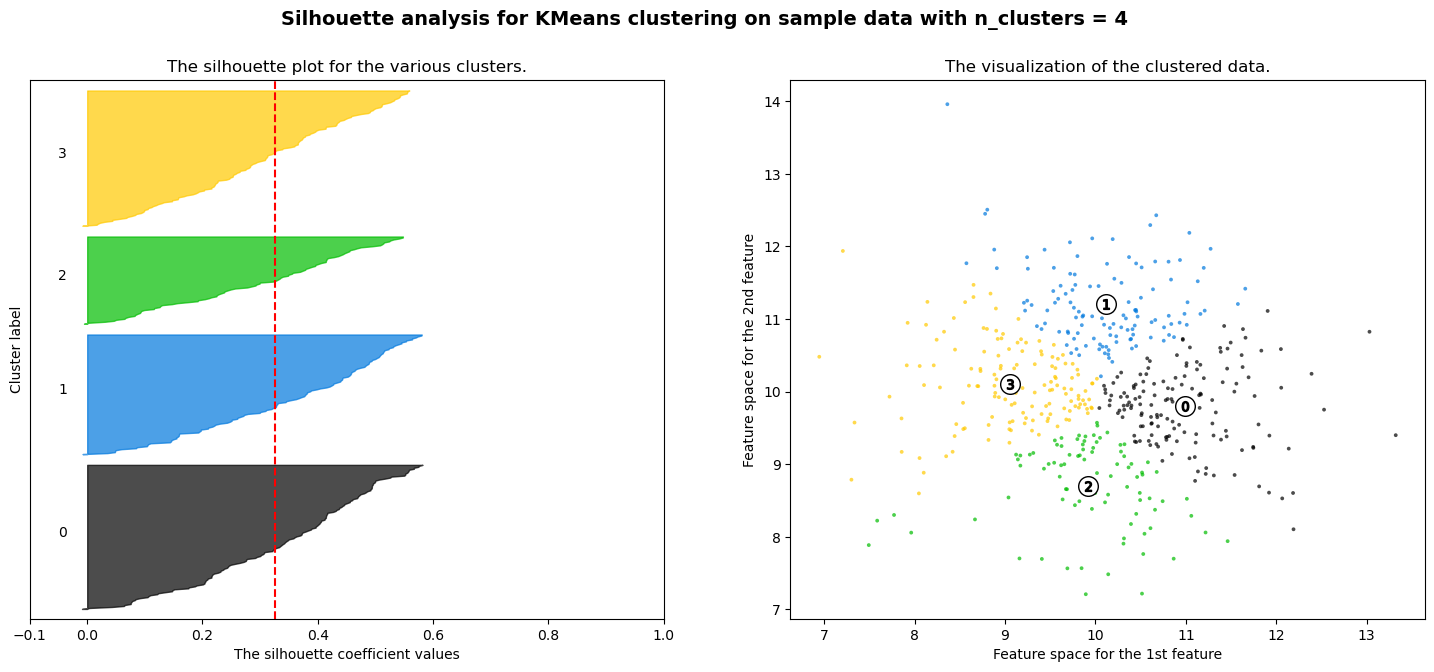

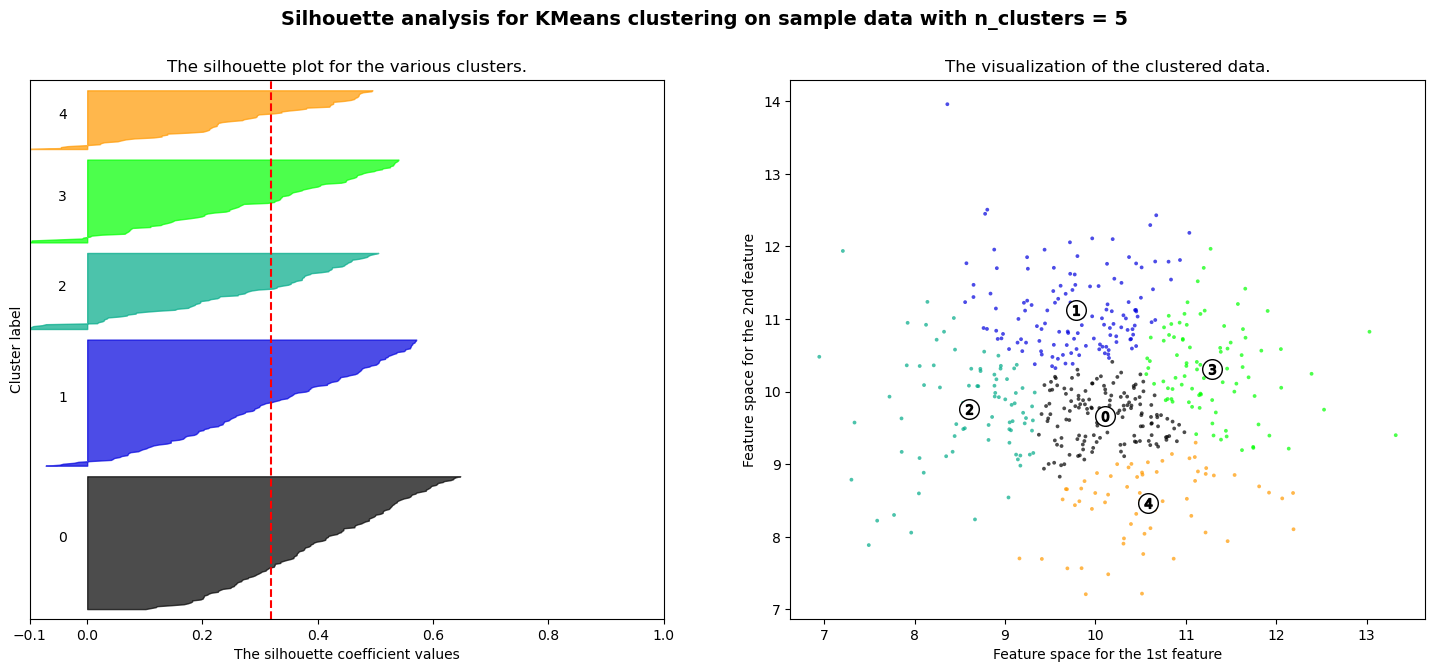

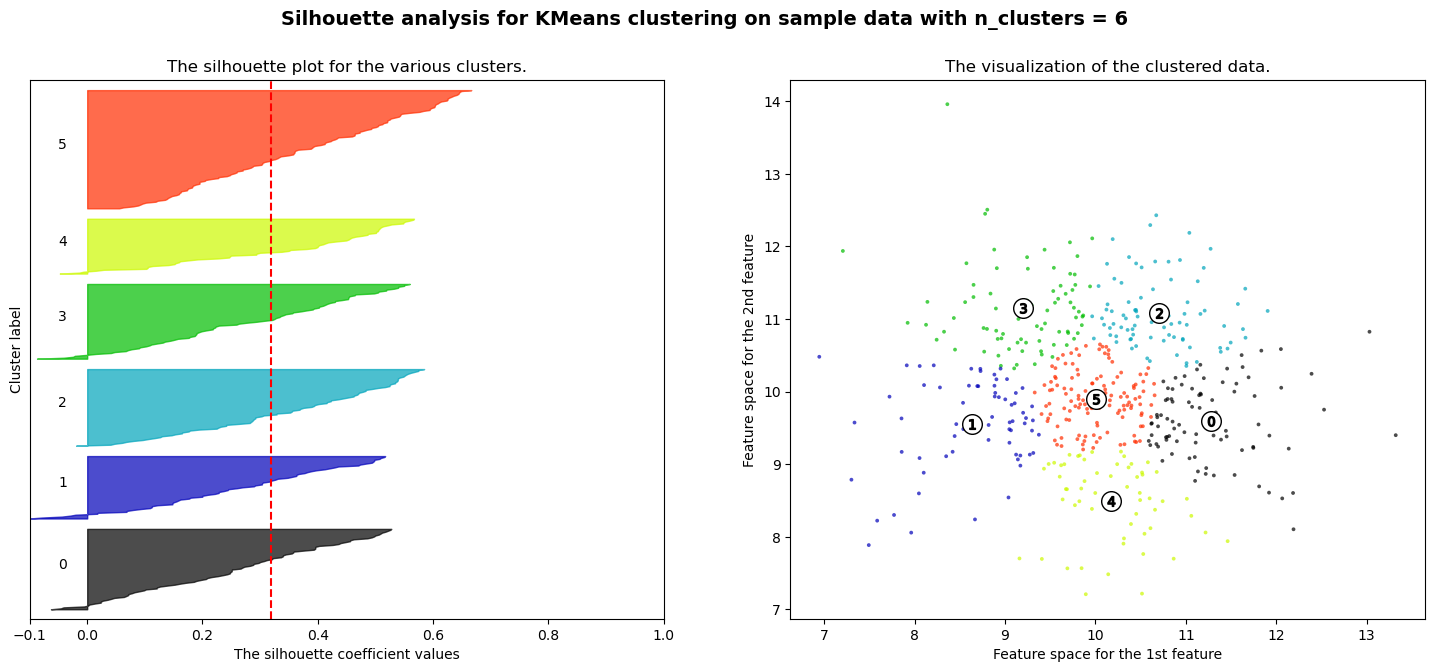

In [6]:
# code is take from sklearn silhoutte score webpage
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
# we have least -ve value in3 and 4. So we will take bigger number for generalised model i.e 4 which also matches our 
# elbow method